In [8]:
__author__ = "Philipp Kats"
__date__ = "2016_02_09"

%pylab inline
import matplotlib.pyplot as plt

import os

import pandas as pd
import geopandas as gp

import community
import networkx as nx

PWD = os.getenv('PWD')
os.chdir(PWD + '/code')
from combo import combo

Populating the interactive namespace from numpy and matplotlib


In [6]:
matrixDF = pd.read_csv(PWD + '/code/Networks/full_matrixUsers2.csv')

In [17]:
# zipcode maps
zipPath = os.getenv('PWD') + '/data/misk/nyc-zip-code-tabulation-areas-polygons.geojson'
zips = gp.read_file(zipPath)[['geometry', 'postalCode']]
print zips.crs


def visualizeZipPartition(partition, zips, key='postalCode', cmap='spectral', title='Zipcode partition'):
    fig, ax = plt.subplots(figsize=(18,18))

    p = pd.Series(partition).reset_index().rename(columns={'index':'postalCode',0:'part'})
    
    z = zips.merge(p, on=key, how='left')
    
    z.plot(ax=ax, alpha=0)
    z[pd.notnull(z['part'])].plot(column = 'part', ax=ax, cmap=cmap)
    
    plt.title(title, fontsize=18)
    plt.axis('off');

{'init': u'epsg:4326'}


## Create Graph

In [9]:
GraphDF = matrixDF.stack().reset_index()
GraphDF.columns = ('node1','node2','weight')
GraphDF.tail()

G = nx.from_pandas_dataframe(GraphDF, 'node1', 'node2', edge_attr='weight')

## Louvain Community detection

In [12]:
# community detection

comm =community.best_partition(G)
print('ZipCode Louvain partitioning modularity={0}'.format(combo.modularity(G, comm, 'weight')))

ZipCode Louvain partitioning modularity=0.203319362677


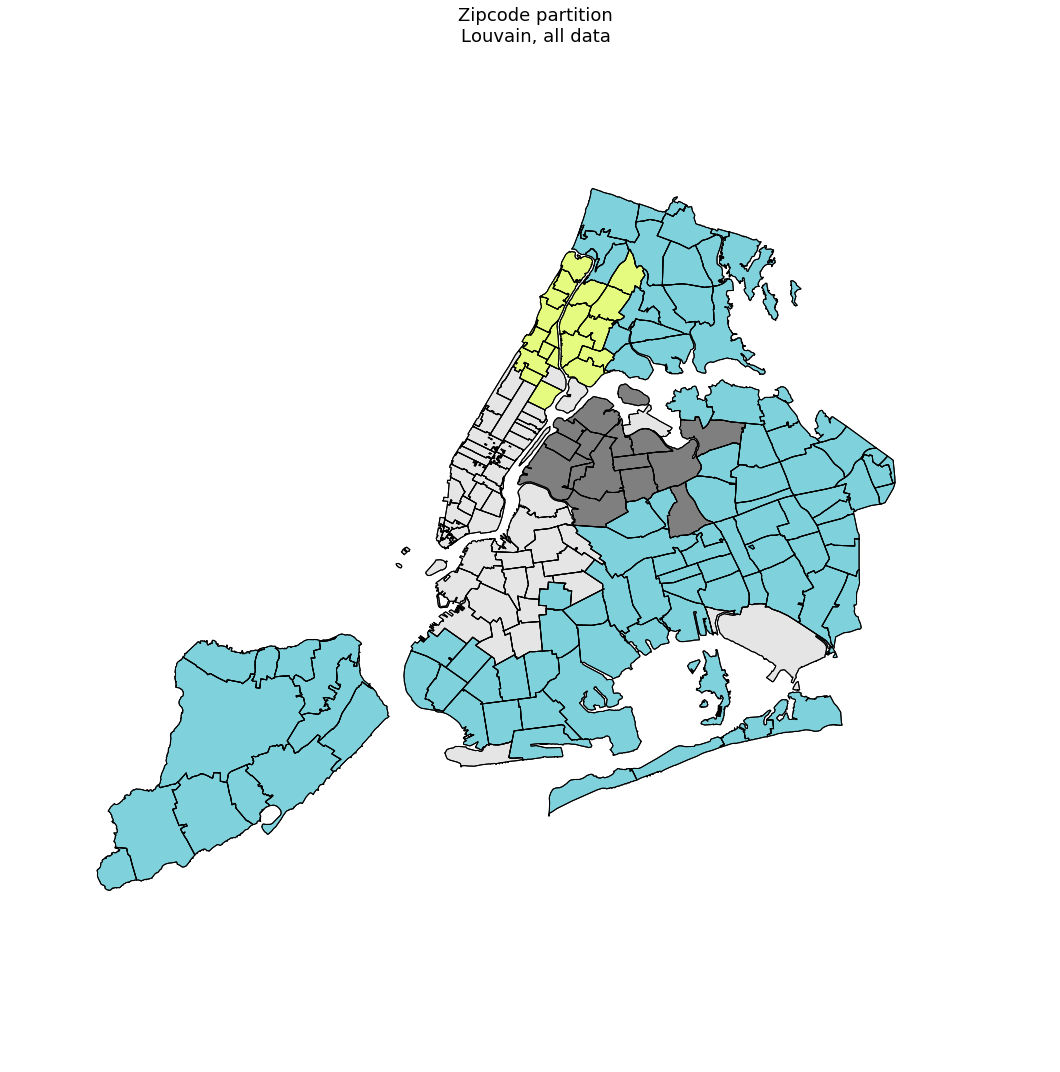

In [18]:
visualizeZipPartition(comm, zips, cmap='spectral_r',title='Zipcode partition\nLouvain, all data')

## Combo Partition

In [23]:
combo_prt = combo.getComboPartition(G,inf)
print('ZipCode Combo modularity={0}'.format(combo.modularity(G, combo_prt, 'weight')))

ZipCode Combo modularity=0.203114631394


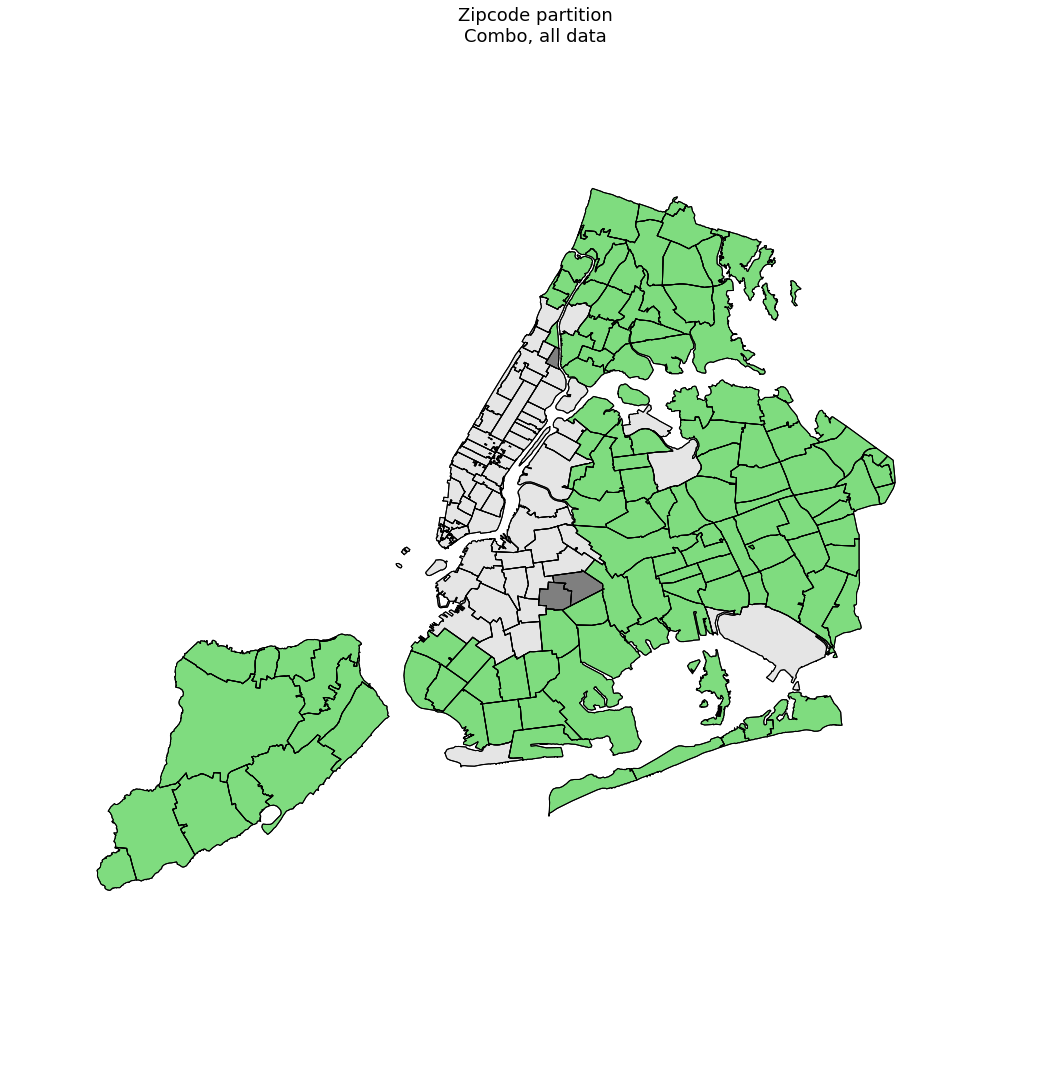

In [24]:
visualizeZipPartition(combo_prt, zips, cmap='spectral_r',title='Zipcode partition\nCombo, all data')

## Check loops

## Weekdays